# CIFAR10 Dataset

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Data Preparation
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

print(train_images.shape)
print(test_images.shape)

170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


## Gaussian Initialize

In [ ]:
import numpy as np
# Data Preparation
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

## Standardize values in the [0, 1]
train_images = (train_images - np.min(train_images, axis=(0, 1, 2))) / (np.max(train_images, axis=(0, 1, 2)) - np.min(train_images, axis=(0, 1, 2)))
test_images  = (test_images - np.min(train_images, axis=(0, 1, 2))) / (np.max(train_images, axis=(0, 1, 2)) - np.min(train_images, axis=(0, 1, 2)))

# model
gaussian_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation='sigmoid',
                       kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=225),
                       bias_initializer=keras.initializers.Zeros()),
    keras.layers.Dense(128, activation='sigmoid',
                       kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=225),
                       bias_initializer=keras.initializers.Zeros()),
    keras.layers.Dense(128, activation='sigmoid',
                       kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=225),
                       bias_initializer=keras.initializers.Zeros()),
    keras.layers.Dense(10, activation='softmax',
                       kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=225),
                       bias_initializer=keras.initializers.Zeros())
])

gaussian_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 427658 (1.63 MB)
Trainable params: 427658 (1.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
gaussian_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
gaussian_history_data = gaussian_model.fit(train_images, train_labels, validation_data=(test_images, test_labels), batch_size=2048, epochs=50)
print(gaussian_history_data.history)

test_loss, test_acc = gaussian_model.evaluate(test_images,  test_labels, verbose=2)
print('\n\nTest accuracy:', test_acc)

Epoch 1/50
25/25 [==============================] - 4s 139ms/step - loss: 2.3038 - accuracy: 0.1006 - val_loss: 2.3033 - val_accuracy: 0.1000
Epoch 2/50
25/25 [==============================] - 4s 153ms/step - loss: 2.2967 - accuracy: 0.1260 - val_loss: 2.2533 - val_accuracy: 0.1429
Epoch 3/50
25/25 [==============================] - 3s 114ms/step - loss: 2.1459 - accuracy: 0.1757 - val_loss: 2.0837 - val_accuracy: 0.1884
Epoch 4/50
25/25 [==============================] - 3s 110ms/step - loss: 2.0681 - accuracy: 0.1856 - val_loss: 2.0708 - val_accuracy: 0.1813
Epoch 5/50
25/25 [==============================] - 3s 111ms/step - loss: 2.0598 - accuracy: 0.1897 - val_loss: 2.0578 - val_accuracy: 0.1925
Epoch 6/50
25/25 [==============================] - 4s 142ms/step - loss: 2.0452 - accuracy: 0.1933 - val_loss: 2.0812 - val_accuracy: 0.1872
Epoch 7/50
25/25 [==============================] - 3s 115ms/step - loss: 2.0321 - accuracy: 0.1965 - val_loss: 2.0630 - val_accuracy: 0.1927
Epoch 

## Glorot Initialize

In [ ]:
import numpy as np
# Data Preparation
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

## Standardize values in the [0, 1]
train_images = (train_images - np.min(train_images, axis=(0, 1, 2))) / (np.max(train_images, axis=(0, 1, 2)) - np.min(train_images, axis=(0, 1, 2)))
test_images  = (test_images - np.min(train_images, axis=(0, 1, 2))) / (np.max(train_images, axis=(0, 1, 2)) - np.min(train_images, axis=(0, 1, 2)))

# model
glorot_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation='sigmoid',
                       kernel_initializer=keras.initializers.GlorotNormal(seed=225),
                       bias_initializer=keras.initializers.Zeros()),
    keras.layers.Dense(128, activation='sigmoid',
                       kernel_initializer=keras.initializers.GlorotNormal(seed=225),
                       bias_initializer=keras.initializers.Zeros()),
    keras.layers.Dense(128, activation='sigmoid',
                       kernel_initializer=keras.initializers.GlorotNormal(seed=225),
                       bias_initializer=keras.initializers.Zeros()),
    keras.layers.Dense(10, activation='softmax',
                       kernel_initializer=keras.initializers.GlorotNormal(seed=225),
                       bias_initializer=keras.initializers.Zeros())
])

glorot_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               393344    
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 427658 (1.63 MB)
Trainable params: 427658 (1.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
glorot_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
glorot_history_data = glorot_model.fit(train_images, train_labels, validation_data=(test_images, test_labels), batch_size=2048, epochs=50)
print(glorot_history_data.history)

test_loss, test_acc = glorot_model.evaluate(test_images,  test_labels, verbose=2)
print('\n\nTest accuracy:', test_acc)

Epoch 1/50
25/25 [==============================] - 5s 163ms/step - loss: 2.2993 - accuracy: 0.1267 - val_loss: 2.2382 - val_accuracy: 0.1849
Epoch 2/50
25/25 [==============================] - 3s 109ms/step - loss: 2.1832 - accuracy: 0.2033 - val_loss: 2.1004 - val_accuracy: 0.1985
Epoch 3/50
25/25 [==============================] - 3s 110ms/step - loss: 2.0508 - accuracy: 0.2415 - val_loss: 2.0087 - val_accuracy: 0.2602
Epoch 4/50
25/25 [==============================] - 3s 128ms/step - loss: 1.9776 - accuracy: 0.2847 - val_loss: 1.9404 - val_accuracy: 0.3000
Epoch 5/50
25/25 [==============================] - 3s 133ms/step - loss: 1.9119 - accuracy: 0.3122 - val_loss: 1.8894 - val_accuracy: 0.3294
Epoch 6/50
25/25 [==============================] - 3s 107ms/step - loss: 1.8704 - accuracy: 0.3290 - val_loss: 1.8547 - val_accuracy: 0.3369
Epoch 7/50
25/25 [==============================] - 3s 110ms/step - loss: 1.8341 - accuracy: 0.3441 - val_loss: 1.8245 - val_accuracy: 0.3462
Epoch 

## He Initialize

In [ ]:
import numpy as np
# Data Preparation
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

## Standardize values in the [0, 1]
train_images = (train_images - np.min(train_images, axis=(0, 1, 2))) / (np.max(train_images, axis=(0, 1, 2)) - np.min(train_images, axis=(0, 1, 2)))
test_images  = (test_images - np.min(train_images, axis=(0, 1, 2))) / (np.max(train_images, axis=(0, 1, 2)) - np.min(train_images, axis=(0, 1, 2)))

# model
he_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation='sigmoid',
                       kernel_initializer=keras.initializers.HeNormal(seed=225),
                       bias_initializer=keras.initializers.Zeros()),
    keras.layers.Dense(128, activation='sigmoid',
                       kernel_initializer=keras.initializers.HeNormal(seed=225),
                       bias_initializer=keras.initializers.Zeros()),
    keras.layers.Dense(128, activation='sigmoid',
                       kernel_initializer=keras.initializers.HeNormal(seed=225),
                       bias_initializer=keras.initializers.Zeros()),
    keras.layers.Dense(10, activation='softmax',
                       kernel_initializer=keras.initializers.HeNormal(seed=225),
                       bias_initializer=keras.initializers.Zeros())
])

he_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               393344    
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 427658 (1.63 MB)
Trainable params: 427658 (1.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
he_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
he_history_data = he_model.fit(train_images, train_labels, validation_data=(test_images, test_labels), batch_size=2048, epochs=50)
print(he_history_data.history)

test_loss, test_acc = he_model.evaluate(test_images,  test_labels, verbose=2)
print('\n\nTest accuracy:', test_acc)

Epoch 1/50
25/25 [==============================] - 4s 134ms/step - loss: 2.2890 - accuracy: 0.1417 - val_loss: 2.2123 - val_accuracy: 0.1922
Epoch 2/50
25/25 [==============================] - 3s 109ms/step - loss: 2.1512 - accuracy: 0.2307 - val_loss: 2.0632 - val_accuracy: 0.2483
Epoch 3/50
25/25 [==============================] - 3s 107ms/step - loss: 2.0166 - accuracy: 0.2819 - val_loss: 1.9731 - val_accuracy: 0.2958
Epoch 4/50
25/25 [==============================] - 4s 145ms/step - loss: 1.9326 - accuracy: 0.3145 - val_loss: 1.9099 - val_accuracy: 0.3163
Epoch 5/50
25/25 [==============================] - 3s 107ms/step - loss: 1.8802 - accuracy: 0.3303 - val_loss: 1.8491 - val_accuracy: 0.3469
Epoch 6/50
25/25 [==============================] - 3s 105ms/step - loss: 1.8354 - accuracy: 0.3453 - val_loss: 1.8110 - val_accuracy: 0.3602
Epoch 7/50
25/25 [==============================] - 3s 107ms/step - loss: 1.7941 - accuracy: 0.3632 - val_loss: 1.7786 - val_accuracy: 0.3657
Epoch 

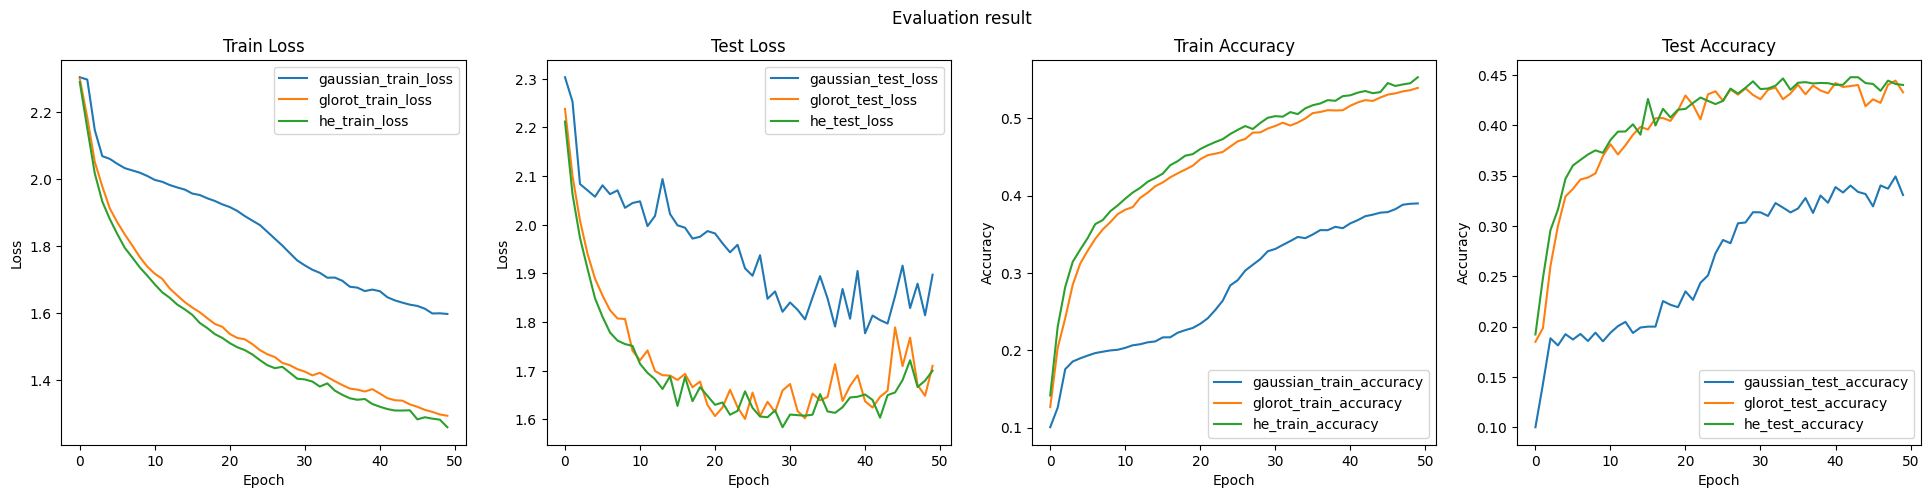

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 5))
fig.suptitle('Evaluation result')

ax1.set_title('Train Loss')
ax1.plot(gaussian_history_data.history['loss'], label = "gaussian_train_loss")
ax1.plot(glorot_history_data.history['loss'], label = "glorot_train_loss")
ax1.plot(he_history_data.history['loss'], label = "he_train_loss")
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.set_title('Test Loss')
ax2.plot(gaussian_history_data.history['val_loss'], label = "gaussian_test_loss")
ax2.plot(glorot_history_data.history['val_loss'], label = "glorot_test_loss")
ax2.plot(he_history_data.history['val_loss'], label = "he_test_loss")
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

ax3.set_title('Train Accuracy')
ax3.plot(gaussian_history_data.history['accuracy'], label = "gaussian_train_accuracy")
ax3.plot(glorot_history_data.history['accuracy'], label = "glorot_train_accuracy")
ax3.plot(he_history_data.history['accuracy'], label = "he_train_accuracy")
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Accuracy')
ax3.legend()

ax4.set_title('Test Accuracy')
ax4.plot(gaussian_history_data.history['val_accuracy'], label = "gaussian_test_accuracy")
ax4.plot(glorot_history_data.history['val_accuracy'], label = "glorot_test_accuracy")
ax4.plot(he_history_data.history['val_accuracy'], label = "he_test_accuracy")
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Accuracy')
ax4.legend()
plt.show()